<a href="https://colab.research.google.com/github/kavyaagarwal178/petrol_price_forecasting/blob/main/new_petrol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import all the libraries**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

**Import google drive content**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read and display the file content**

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/train_data.csv")
df1.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


**Data analysis**

In [ ]:
df2 = df1.dropna()

In [ ]:
df2.rename(columns={"Petrol (USD)" : "Petrol"}, inplace=True)
df2.head()

<ipython-input-6-0be441df67ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={"Petrol (USD)" : "Petrol"}, inplace=True)


,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


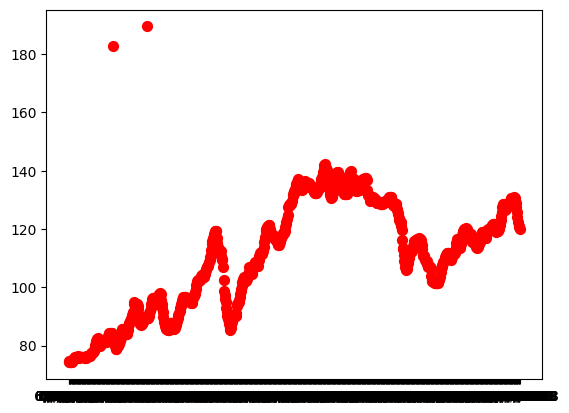

In [ ]:
plt.scatter(df2.Date, df2.Petrol,color='red',label='Prices', s=50)

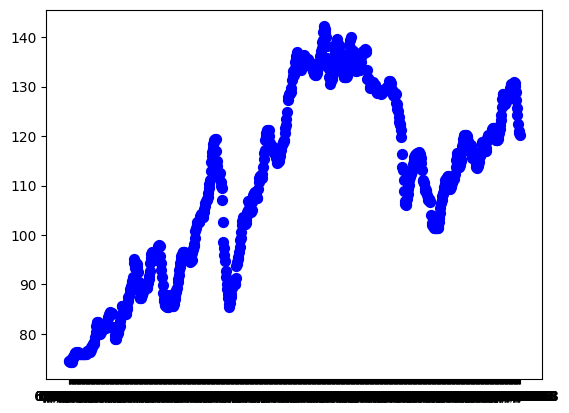

In [ ]:
df3=df2[df2.Petrol<160]
plt.scatter(df3.Date, df3.Petrol,color='blue',label='Prices', s=50)

In [ ]:
df4=df3.reset_index()['Petrol']
df4.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df4=scaler.fit_transform(np.array(df4).reshape(-1,1))

In [ ]:
df4

array([[0.00559152],
       [0.00382578],
       [0.00309005],
       [0.00206004],
       [0.00103002],
       [0.        ],
       [0.0126545 ],
       [0.01309594],
       [0.01339023],
       [0.01809888],
       [0.02354326],
       [0.02707475],
       [0.02825191],
       [0.02972337],
       [0.02928193],
       [0.0285462 ],
       [0.02751619],
       [0.03266627],
       [0.02486757],
       [0.02707475],
       [0.02633902],
       [0.02633902],
       [0.02545615],
       [0.02530901],
       [0.02663331],
       [0.02633902],
       [0.02589759],
       [0.02575044],
       [0.02516186],
       [0.02545615],
       [0.02457328],
       [0.02486757],
       [0.03163626],
       [0.03281342],
       [0.033402  ],
       [0.03369629],
       [0.03281342],
       [0.03193055],
       [0.03104768],
       [0.03708064],
       [0.04679223],
       [0.04752796],
       [0.04973514],
       [0.05370806],
       [0.05400235],
       [0.05635668],
       [0.06165391],
       [0.074

In [ ]:
training_size=int(len(df4)*0.65)
test_size=len(df4)-training_size
train_data,test_data=df4[0:training_size,:],df4[training_size:len(df4),:1]

In [ ]:
train_data.shape
test_data.shape

(284, 1)

**Data preproccessing**

In [ ]:
 import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train

array([[0.00559152, 0.00382578, 0.00309005, ..., 0.16627428, 0.16524426,
        0.1640671 ],
       [0.00382578, 0.00309005, 0.00206004, ..., 0.16524426, 0.1640671 ,
        0.16274279],
       [0.00309005, 0.00206004, 0.00103002, ..., 0.1640671 , 0.16274279,
        0.15538552],
       ...,
       [0.91024132, 0.91597999, 0.90847557, ..., 0.88419659, 0.88655091,
        0.88743378],
       [0.91597999, 0.90847557, 0.88802237, ..., 0.88655091, 0.88743378,
        0.87154208],
       [0.90847557, 0.88802237, 0.88449088, ..., 0.88743378, 0.87154208,
        0.87639788]])

In [ ]:
y_train

array([0.16274279, 0.15538552, 0.14670394, 0.14420247, 0.15862272,
       0.16642142, 0.18422602, 0.19540906, 0.19894055, 0.21100647,
       0.21762802, 0.22130665, 0.22748676, 0.2405827 , 0.24367275,
       0.2532372 , 0.29664509, 0.30694526, 0.29723367, 0.28134197,
       0.28399058, 0.29487934, 0.29326074, 0.283402  , 0.26868746,
       0.24014126, 0.21188935, 0.19334903, 0.19334903, 0.19114185,
       0.19643908, 0.20114773, 0.20335491, 0.21115362, 0.21777516,
       0.22572101, 0.23057681, 0.22836963, 0.22719247, 0.22645674,
       0.2230724 , 0.22572101, 0.23513832, 0.24941142, 0.25853443,
       0.27310182, 0.29458505, 0.31106533, 0.32254267, 0.32739847,
       0.32636845, 0.32210124, 0.31121248, 0.30944673, 0.31312537,
       0.31238964, 0.30547381, 0.30988817, 0.31606828, 0.33357858,
       0.34682166, 0.34755739, 0.35079459, 0.34741024, 0.316804  ,
       0.29708652, 0.27472042, 0.25412007, 0.22910536, 0.20585639,
       0.18746321, 0.18231313, 0.17216009, 0.16965862, 0.16759

In [ ]:
print(X_train.shape), print(y_train.shape)

(424, 100)
(424,)


(None, None)

**LTSM**

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 10s 539ms/step - loss: 0.1697 - val_loss: 0.0829
Epoch 2/100
7/7 [==============================] - 1s 179ms/step - loss: 0.0404 - val_loss: 0.0166
Epoch 3/100
7/7 [==============================] - 1s 179ms/step - loss: 0.0258 - val_loss: 0.0052
Epoch 4/100
7/7 [==============================] - 1s 180ms/step - loss: 0.0128 - val_loss: 0.0118
Epoch 5/100
7/7 [==============================] - 1s 180ms/step - loss: 0.0098 - val_loss: 0.0044
Epoch 6/100
7/7 [==============================] - 1s 182ms/step - loss: 0.0090 - val_loss: 0.0035
Epoch 7/100
7/7 [==============================] - 1s 181ms/step - loss: 0.0074 - val_loss: 0.0044
Epoch 8/100
7/7 [==============================] - 1s 180ms/step - loss: 0.0067 - val_loss: 0.0034
Epoch 9/100
7/7 [==============================] - 2s 262ms/step - loss: 0.0063 - val_loss: 0.0043
Epoch 10/100
7/7 [==============================] - 2s 309ms/step - loss: 0.0061 - val_loss: 0.0032
Epoch 11

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 35ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

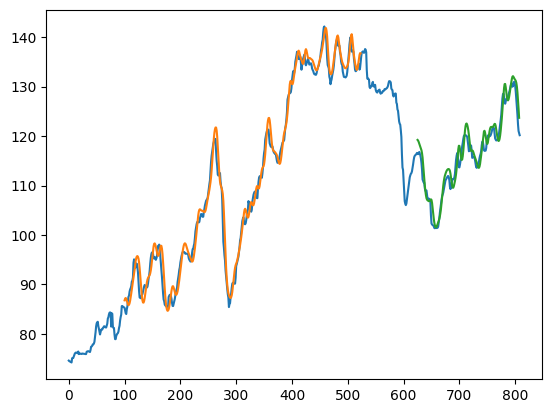

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df4)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df4)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df4)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df4))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
df_test=pd.read_csv("/content/drive/MyDrive/test_data.csv")
df_test.head()

,Date,Prediction
0,1/1/2019,NaN
1,1/2/2019,NaN
2,1/3/2019,NaN
3,1/4/2019,NaN
4,1/5/2019,NaN


In [ ]:
model.save("prtrol price prediction")

**Using ARIMA**

In [ ]:
!pip install --upgrade patsy

In [ ]:
!pip install statsmodels

In [ ]:
!pip install --upgrade --no-deps statsmodels

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

<ipython-input-31-9296888fb653>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/train_data.csv")
df.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [ ]:
df.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
df.head()

,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [ ]:
df2 = df.dropna()
df3=df2[df2.Petrol<160]
df3.head()

,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [ ]:
df4=df3.reset_index()['Petrol']
df4.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [ ]:
model1 = ARIMA(df4.values, order=(5,1,0))
model_fit1 = model1.fit()
output1= model_fit1.forecast(steps=30)
output1

array([119.80670599, 119.52143354, 119.30634698, 119.14818605,
       119.02925494, 118.93899217, 118.87071727, 118.81917633,
       118.78030453, 118.75097725, 118.72884028, 118.71213018,
       118.69951765, 118.6899984 , 118.68281381, 118.67739118,
       118.6732984 , 118.67020932, 118.66787782, 118.66611809,
       118.66478993, 118.66378748, 118.66303088, 118.66245982,
       118.66202882, 118.66170351, 118.66145798, 118.66127267,
       118.6611328 , 118.66102723])

**Using Auto ML**

In [ ]:
!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1

  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc1) to /tmp/pip-req-build-boa_8cgz
  Running command git clone --filter=blob:none --quiet https://github.com/keras-team/keras-tuner.git /tmp/pip-req-build-boa_8cgz
  Running command git checkout -q 0fb69434a132093518e0e53d40020145ae192629
  Resolved https://github.com/keras-team/keras-tuner.git to commit 0fb69434a132093518e0e53d40020145ae192629
  Preparing metadata (setup.py) ... done
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc1-py3-none-any.whl size=85426 sha256=b72e06af7dffcd253297c31362afaec6b0dd147d12cb063727e74052cf718597
  Stored in directory: /tmp/pip-ephem-wheel-cache-4p0rhe4o/wheels/b8/e6/44/4b6aa4a149abdabe9752582dbd7d7ae0848e87fe71cd2c59ed
Successfully built keras-tuner
